<a href="https://www.kaggle.com/code/tolgaerdogmus/wiki-text-preprocessing-visualization-nlp?scriptVersionId=193183620" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [66]:
import re
from collections import Counter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from textblob import Word, TextBlob
from warnings import filterwarnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wikimedia/wiki_data.csv


In [42]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

In [43]:
# nlp = spacy.load("en_core_web_sm") 

# words = ["run", "running", "ran"] 

# stemmed_words = [nlp(word)[0].lemma_ for word in words] 

# print(stemmed_logs) 
# # prints: ["run", "run", "run"]

In [44]:
#Read data
df = pd.read_csv("/kaggle/input/wikimedia/wiki_data.csv", index_col=0)

In [45]:
#Take 2000 rows
df = df[:2000]

In [46]:
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [47]:
df.shape

(2000, 1)

In [48]:
#################################################
# Görevler:
#################################################

# Görev 1: Metindeki ön işleme işlemlerini gerçekleştirecek bir fonksiyon yazınız.
# •	Büyük küçük harf dönüşümünü yapınız.
# •	Noktalama işaretlerini çıkarınız.
# •	Numerik ifadeleri çıkarınız.

In [49]:
# Görev 2: Metin içinde öznitelik çıkarımı yaparken önemli olmayan kelimeleri çıkaracak fonksiyon yazınız.

In [50]:
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
def clean_text_nltk(text, min_word_frequency=1000):
    # Ensure text is a string
    text = str(text)
   
    # Lowercase
    text = text.lower()
   
    # Tokenize
    tokens = word_tokenize(text)
   
    # Remove punctuation and numbers
    tokens = [word for word in tokens if word.isalpha()]
   
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
   
    # Count word frequencies
    word_freq = Counter(tokens)
   
    # Remove rare words
    tokens = [word for word in tokens if word_freq[word] >= min_word_frequency]
   
    # Join tokens back into string
    cleaned_text = ' '.join(tokens)
   
    return cleaned_text

In [69]:
# Function to apply cleaning to the entire dataframe
def clean_dataframe_text(df, text_column, min_word_frequency=1000):
    # Combine all text for word frequency calculation
    all_text = ' '.join(df[text_column])
    
    # Calculate word frequencies
    word_freq = Counter(word_tokenize(all_text.lower()))
    
    # Clean each text entry
    df['cleaned_text'] = df[text_column].apply(
        lambda x: clean_text_nltk(x, min_word_frequency)
    )
    
    return df

In [ ]:
# Clean the entire dataframe
#df = clean_dataframe_text(df, 'text', min_word_frequency=5)

# Or clean individual texts
df['text'] = df['text'].apply(lambda x: clean_text_nltk(x, min_word_frequency=1000))

In [53]:
# Görev 3: Metinde az tekrarlayan kelimeleri bulunuz.
# pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

ethane              1
scf                 1
vermessungswesen    1
zeitschrift         1
stuttgarter         1
                   ..
hashvals            1
collabora           1
suse                1
novell              1
chandrasekhar       1
Name: count, Length: 1000, dtype: int64

In [54]:
# Görev 4: Metinde az tekrarlayan kelimeleri metin içerisinden çıkartınız. (İpucu: lambda fonksiyonunu kullanınız.)
# already did above
#sil = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
#df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [55]:
# Görev 5: Metinleri tokenize edip sonuçları gözlemleyiniz.

df["text"].apply(lambda x: TextBlob(x).words)

1       [anovo, anovo, formerly, novo, computer, servi...
2       [battery, indicator, battery, indicator, also,...
3       [bob, pease, robert, allen, pease, august, jun...
4       [cavnet, cavnet, secure, military, forum, beca...
5       [clidar, clidar, scientific, instrument, used,...
                              ...                        
1996    [edinburgh, calotype, club, edinburgh, calotyp...
1997    [endrin, endrin, organochloride, chemical, for...
1998    [ethylene, glycol, dinitrate, ethylene, glycol...
1999    [forges, de, syam, forges, de, syam, syam, for...
2000    [theory, combustion, theory, explains, thermal...
Name: text, Length: 2000, dtype: object

In [57]:
# Görev 6: Lemmatization işlemini yapınız.
# ran, runs, running -> run (normalleştirme)

#df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

def spacy_stem(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])


In [59]:
# After your cleaning steps, apply stemming
df['text'] = df['text'].apply(spacy_stem)

df.head()

,text
1,anovo anovo formerly novo computer service com...
2,battery indicator battery indicator also know ...
3,bob pease robert allen pease august june analo...
4,cavnet cavnet secure military forum become ope...
5,clidar clidar scientific instrument use measur...


In [60]:
# Görev 7: Metindeki terimlerin frekanslarını hesaplayınız. (İpucu: Barplot grafiği için gerekli)

tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index() # kodu güncellemek gerekecek

tf.head()

,index,0
0,anovo,2.00
1,company,2495.00
2,rating,105.00
3,november,277.00
4,news,148.00


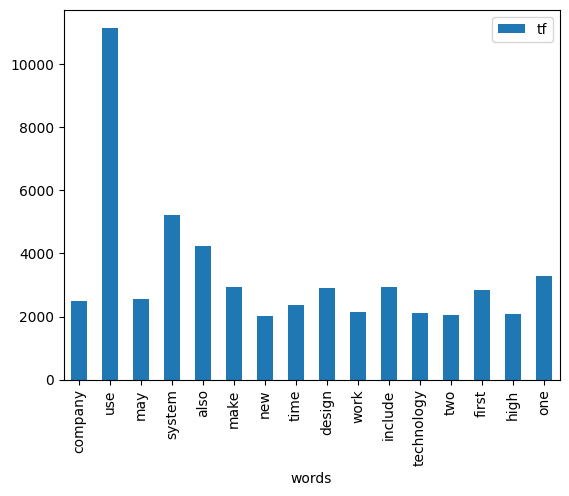

In [61]:
# Görev 8: Barplot grafiğini oluşturunuz.

# Sütunların isimlendirilmesi
tf.columns = ["words", "tf"]
# 2000'den fazla geçen kelimelerin görselleştirilmesi
tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()

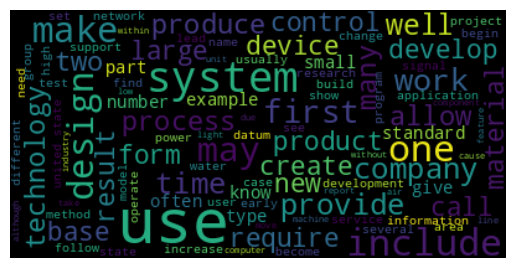

In [62]:
# Kelimeleri WordCloud ile görselleştiriniz.

# kelimeleri birleştirdik
text = " ".join(i for i in df["text"])

# wordcloud görselleştirmenin özelliklerini belirliyoruz
wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [74]:
# Görev 9: Tüm aşamaları tek bir fonksiyon olarak yazınız.
# •	Metin ön işleme işlemlerini gerçekleştiriniz.
# •	Görselleştirme işlemlerini fonksiyona argüman olarak ekleyiniz.
# •	Fonksiyonu açıklayan 'docstring' yazınız.

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from collections import Counter

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
stop_words = set(stopwords.words('english'))

def wiki_preprocess(df, text_column, Barplot=False, Wordcloud=False):
    """
    Preprocesses text data in a DataFrame and optionally creates visualizations.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the text data.
    text_column (str): The name of the column containing the text to be processed.
    Barplot (bool): If True, creates a bar plot of word frequencies.
    Wordcloud (bool): If True, creates a word cloud visualization.

    Returns:
    pandas.DataFrame: The DataFrame with an additional 'cleaned_text' column.
    """

    def clean_and_tokenize(text):
        text = str(text).lower()
        return [word for word in word_tokenize(text) if word.isalpha() and word not in stop_words]

    def process_text(tokens):
        doc = nlp(' '.join(tokens))
        return [token.lemma_ for token in doc]

    # Apply cleaning and tokenization
    df['tokens'] = df[text_column].apply(clean_and_tokenize)

    # Apply stemming
    df['cleaned_tokens'] = df['tokens'].apply(process_text)

    # Count word frequencies
    word_freq = Counter([word for tokens in df['cleaned_tokens'] for word in tokens])

    # Remove rare words (appearing 5 times or less)
    rare_words = {word for word, count in word_freq.items() if count <= 5}
    df['cleaned_text'] = df['cleaned_tokens'].apply(lambda tokens: ' '.join(word for word in tokens if word not in rare_words))

    # Clean up intermediate columns
    df = df.drop(['tokens', 'cleaned_tokens'], axis=1)

    if Barplot or Wordcloud:
        # Calculate word frequencies for visualization
        vis_word_freq = Counter([word for text in df['cleaned_text'] for word in text.split()])

    if Barplot:
        # Create and display bar plot
        top_words = dict(sorted(vis_word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
        plt.figure(figsize=(12, 6))
        plt.bar(top_words.keys(), top_words.values())
        plt.title("Top 20 Word Frequencies")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    if Wordcloud:
        # Create and display word cloud
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(vis_word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title("Word Cloud")
        plt.tight_layout()
        plt.show()

    return df

# Usage
# df = pd.read_csv("/kaggle/input/wikimedia/wiki_data.csv", index_col=0)
# processed_df = wiki_preprocess(df, 'text', Barplot=True, Wordcloud=True)

In [ ]:
processed_df = wiki_preprocess(df, 'text', Barplot=True, Wordcloud=True)